# Feature Engineering 

## Imports and Dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("insurance_claims_cleaned_feature engineering.csv")

In [29]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Count Blanks
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,0
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Unsure,5070,780,780,3510,Mercedes,E400,2007,Y,0
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,0
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,0


### Missing Values

In [30]:
null_counts = df.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### Binding Numeric Data

In [31]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Count Blanks
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,203.954000,38.961000,546238.648000,1134.000000,1257.02011,1.103000e+06,501214.488000,25170.280000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.0
std,115.113174,9.126378,257063.005276,610.669237,243.90920,2.296446e+06,71701.610941,27850.117884,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.0
min,0.000000,19.000000,100804.000000,500.000000,433.33000,0.000000e+00,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.0
25%,115.750000,32.000000,335980.250000,500.000000,1090.56750,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.0
50%,199.500000,38.000000,533135.000000,1000.000000,1258.41500,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.0
75%,276.250000,44.000000,759099.750000,2000.000000,1415.69500,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.0
max,479.000000,64.000000,999435.000000,2000.000000,2047.59000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,0.0


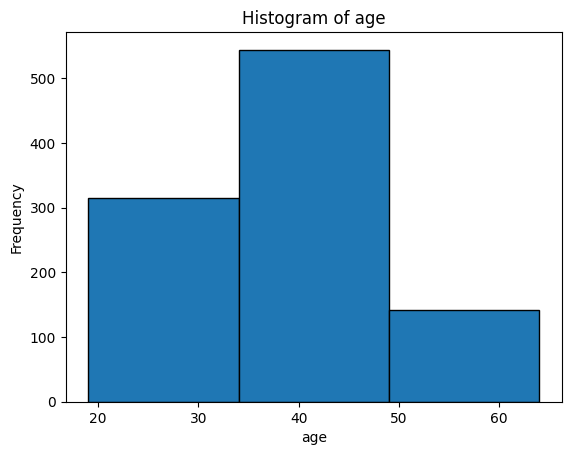

In [32]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [33]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['ages_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)

In [34]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Count Blanks,ages_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,0,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,0,Middle Aged
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,0,Young Adult
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,0,Middle Aged
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,0,Middle Aged


In [35]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['customer_category'] = pd.cut(df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [36]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Count Blanks,ages_category,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,0,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,0,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,0,Young Adult,Established Client
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,0,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,0,Middle Aged,Long-Term Client


## Creating New Features

In [37]:
# Encoding Categorical Variables (example: policy_state)
policy_state_dummies = pd.get_dummies(df['policy_state'], prefix='state')
df = pd.concat([df, policy_state_dummies], axis=1)

# Creating Claim Ratios
df['injury_claim_ratio'] = df['injury_claim'] / df['total_claim_amount']
df['property_claim_ratio'] = df['property_claim'] / df['total_claim_amount']
df['vehicle_claim_ratio'] = df['vehicle_claim'] / df['total_claim_amount']

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,fraud_reported,Count Blanks,ages_category,customer_category,state_IL,state_IN,state_OH,injury_claim_ratio,property_claim_ratio,vehicle_claim_ratio
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Y,0,Middle Aged,Long-Term Client,0,0,1,0.090909,0.181818,0.727273
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Y,0,Middle Aged,Long-Term Client,0,1,0,0.153846,0.153846,0.692308
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,N,0,Young Adult,Established Client,0,0,1,0.222222,0.111111,0.666667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Y,0,Middle Aged,Long-Term Client,1,0,0,0.100000,0.100000,0.800000
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,N,0,Middle Aged,Long-Term Client,1,0,0,0.200000,0.100000,0.700000


In [38]:
df["Contract Years"] = df["months_as_customer"]/12

In [39]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,Count Blanks,ages_category,customer_category,state_IL,state_IN,state_OH,injury_claim_ratio,property_claim_ratio,vehicle_claim_ratio,Contract Years
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,0,Middle Aged,Long-Term Client,0,0,1,0.090909,0.181818,0.727273,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,Middle Aged,Long-Term Client,0,1,0,0.153846,0.153846,0.692308,19.000000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,0,Young Adult,Established Client,0,0,1,0.222222,0.111111,0.666667,11.166667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,0,Middle Aged,Long-Term Client,1,0,0,0.100000,0.100000,0.800000,21.333333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,0,Middle Aged,Long-Term Client,1,0,0,0.200000,0.100000,0.700000,19.000000


## Feature Joining

In [40]:
df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']

In [41]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,ages_category,customer_category,state_IL,state_IN,state_OH,injury_claim_ratio,property_claim_ratio,vehicle_claim_ratio,Contract Years,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Middle Aged,Long-Term Client,0,0,1,0.090909,0.181818,0.727273,27.333333,38455.540000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Middle Aged,Long-Term Client,0,1,0,0.153846,0.153846,0.692308,19.000000,22747.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,Young Adult,Established Client,0,0,1,0.222222,0.111111,0.666667,11.166667,15780.063333
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Middle Aged,Long-Term Client,1,0,0,0.100000,0.100000,0.800000,21.333333,30202.453333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,Middle Aged,Long-Term Client,1,0,0,0.200000,0.100000,0.700000,19.000000,30094.290000


In [42]:
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

In [43]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,customer_category,state_IL,state_IN,state_OH,injury_claim_ratio,property_claim_ratio,vehicle_claim_ratio,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Long-Term Client,0,0,1,0.090909,0.181818,0.727273,27.333333,38455.540000,-33154.460000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Long-Term Client,0,1,0,0.153846,0.153846,0.692308,19.000000,22747.180000,17677.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,Established Client,0,0,1,0.222222,0.111111,0.666667,11.166667,15780.063333,-18869.936667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Long-Term Client,1,0,0,0.100000,0.100000,0.800000,21.333333,30202.453333,-33197.546667
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,Long-Term Client,1,0,0,0.200000,0.100000,0.700000,19.000000,30094.290000,23594.290000


## Scaling the data

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Columns to scale
columns_to_scale = ['age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 
                    'umbrella_limit', 'insured_zip', 'total_claim_amount', 
                    'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']

# Standardization with StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[columns_to_scale])

# Creating new column names for scaled values
scaled_column_names = [col + '_scaled' for col in columns_to_scale]

# Adding scaled values as new columns to the dataframe
for i, col in enumerate(scaled_column_names):
    df[col] = scaled_values[:, i]

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_number_scaled,policy_deductable_scaled,policy_annual_premium_scaled,umbrella_limit_scaled,insured_zip_scaled,total_claim_amount_scaled,injury_claim_scaled,property_claim_scaled,vehicle_claim_scaled,auto_year_scaled
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,-0.095953,-0.219541,0.614839,-0.480548,-0.489529,0.714257,-0.189283,1.165505,0.749653,-0.183440
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,-0.791527,1.418826,-0.245296,1.697819,-0.461008,-1.807312,-1.363822,-1.372696,-1.823346,0.315491
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,0.550566,1.418826,0.640394,1.697819,-0.984885,-0.686362,0.054644,-0.736072,-0.785565,0.315491
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,-1.239334,1.418826,0.651059,2.133492,1.491682,0.403135,-0.224130,-0.219722,0.677607,1.479664
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,-0.695834,-0.219541,1.340882,2.133492,1.527808,-1.753121,-1.257232,-1.399654,-1.768252,0.648112


## Save the csv for modeling

In [46]:
df.to_csv('Insurance_claims_Engineered.csv')